In [1]:
!nvidia-smi

Tue Dec 24 10:47:09 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLO11 via Ultralytics

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


## Fine-tune YOLO11 on custom dataset

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AbAyUWUHFqQ2sJZbDvXo")
project = rf.workspace("tec-tour").project("pro-ajxe8")
version = project.version(11)
dataset = version.download("yolov11")


/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pro-11 in yolov11:: 100%|██████████| 2112/2112 [00:00<00:00, 7615.02it/s]


In [5]:
data_yaml_path = '/kaggle/working/datasets/pro-11/data.yaml'
new_data_yaml_content = """
train: /kaggle/working/datasets/pro-11/train
val: /kaggle/working/datasets/pro-11/valid
test: /kaggle/working/datasets/pro-11/test

nc: 14
names: ['Al Faisaliah Tower', 'Al Masmak Palace', 'Al-Subaie Palace', 'Diriyah', 'Hegra', 'Ithra', 'Jabal AlFil -Elephant Rock-', 'King Abdullah Financial District -KAFD-', 'Kingdom Tower', 'Maraya', 'Rejal Almaa', 'Tabuk Fortress', 'murabba palace', 'safiyyah museum']

roboflow:
  workspace: tec-tour
  project: pro-ajxe8
  version: 11
  license: Public Domain
  url: https://universe.roboflow.com/tec-tour/pro-ajxe8/dataset/11
"""

with open(data_yaml_path, 'w') as file:
    file.write(new_data_yaml_content.strip())

print(f"Updated data.yaml at {data_yaml_path}")

Updated data.yaml at /kaggle/working/datasets/pro-11/data.yaml


## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 optimizer=adam lr0=0.0001 lrf=0.001


/kaggle/working
100%|███████████████████████████████████████| 18.4M/18.4M [00:00<00:00, 151MB/s]
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/datasets/pro-11/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

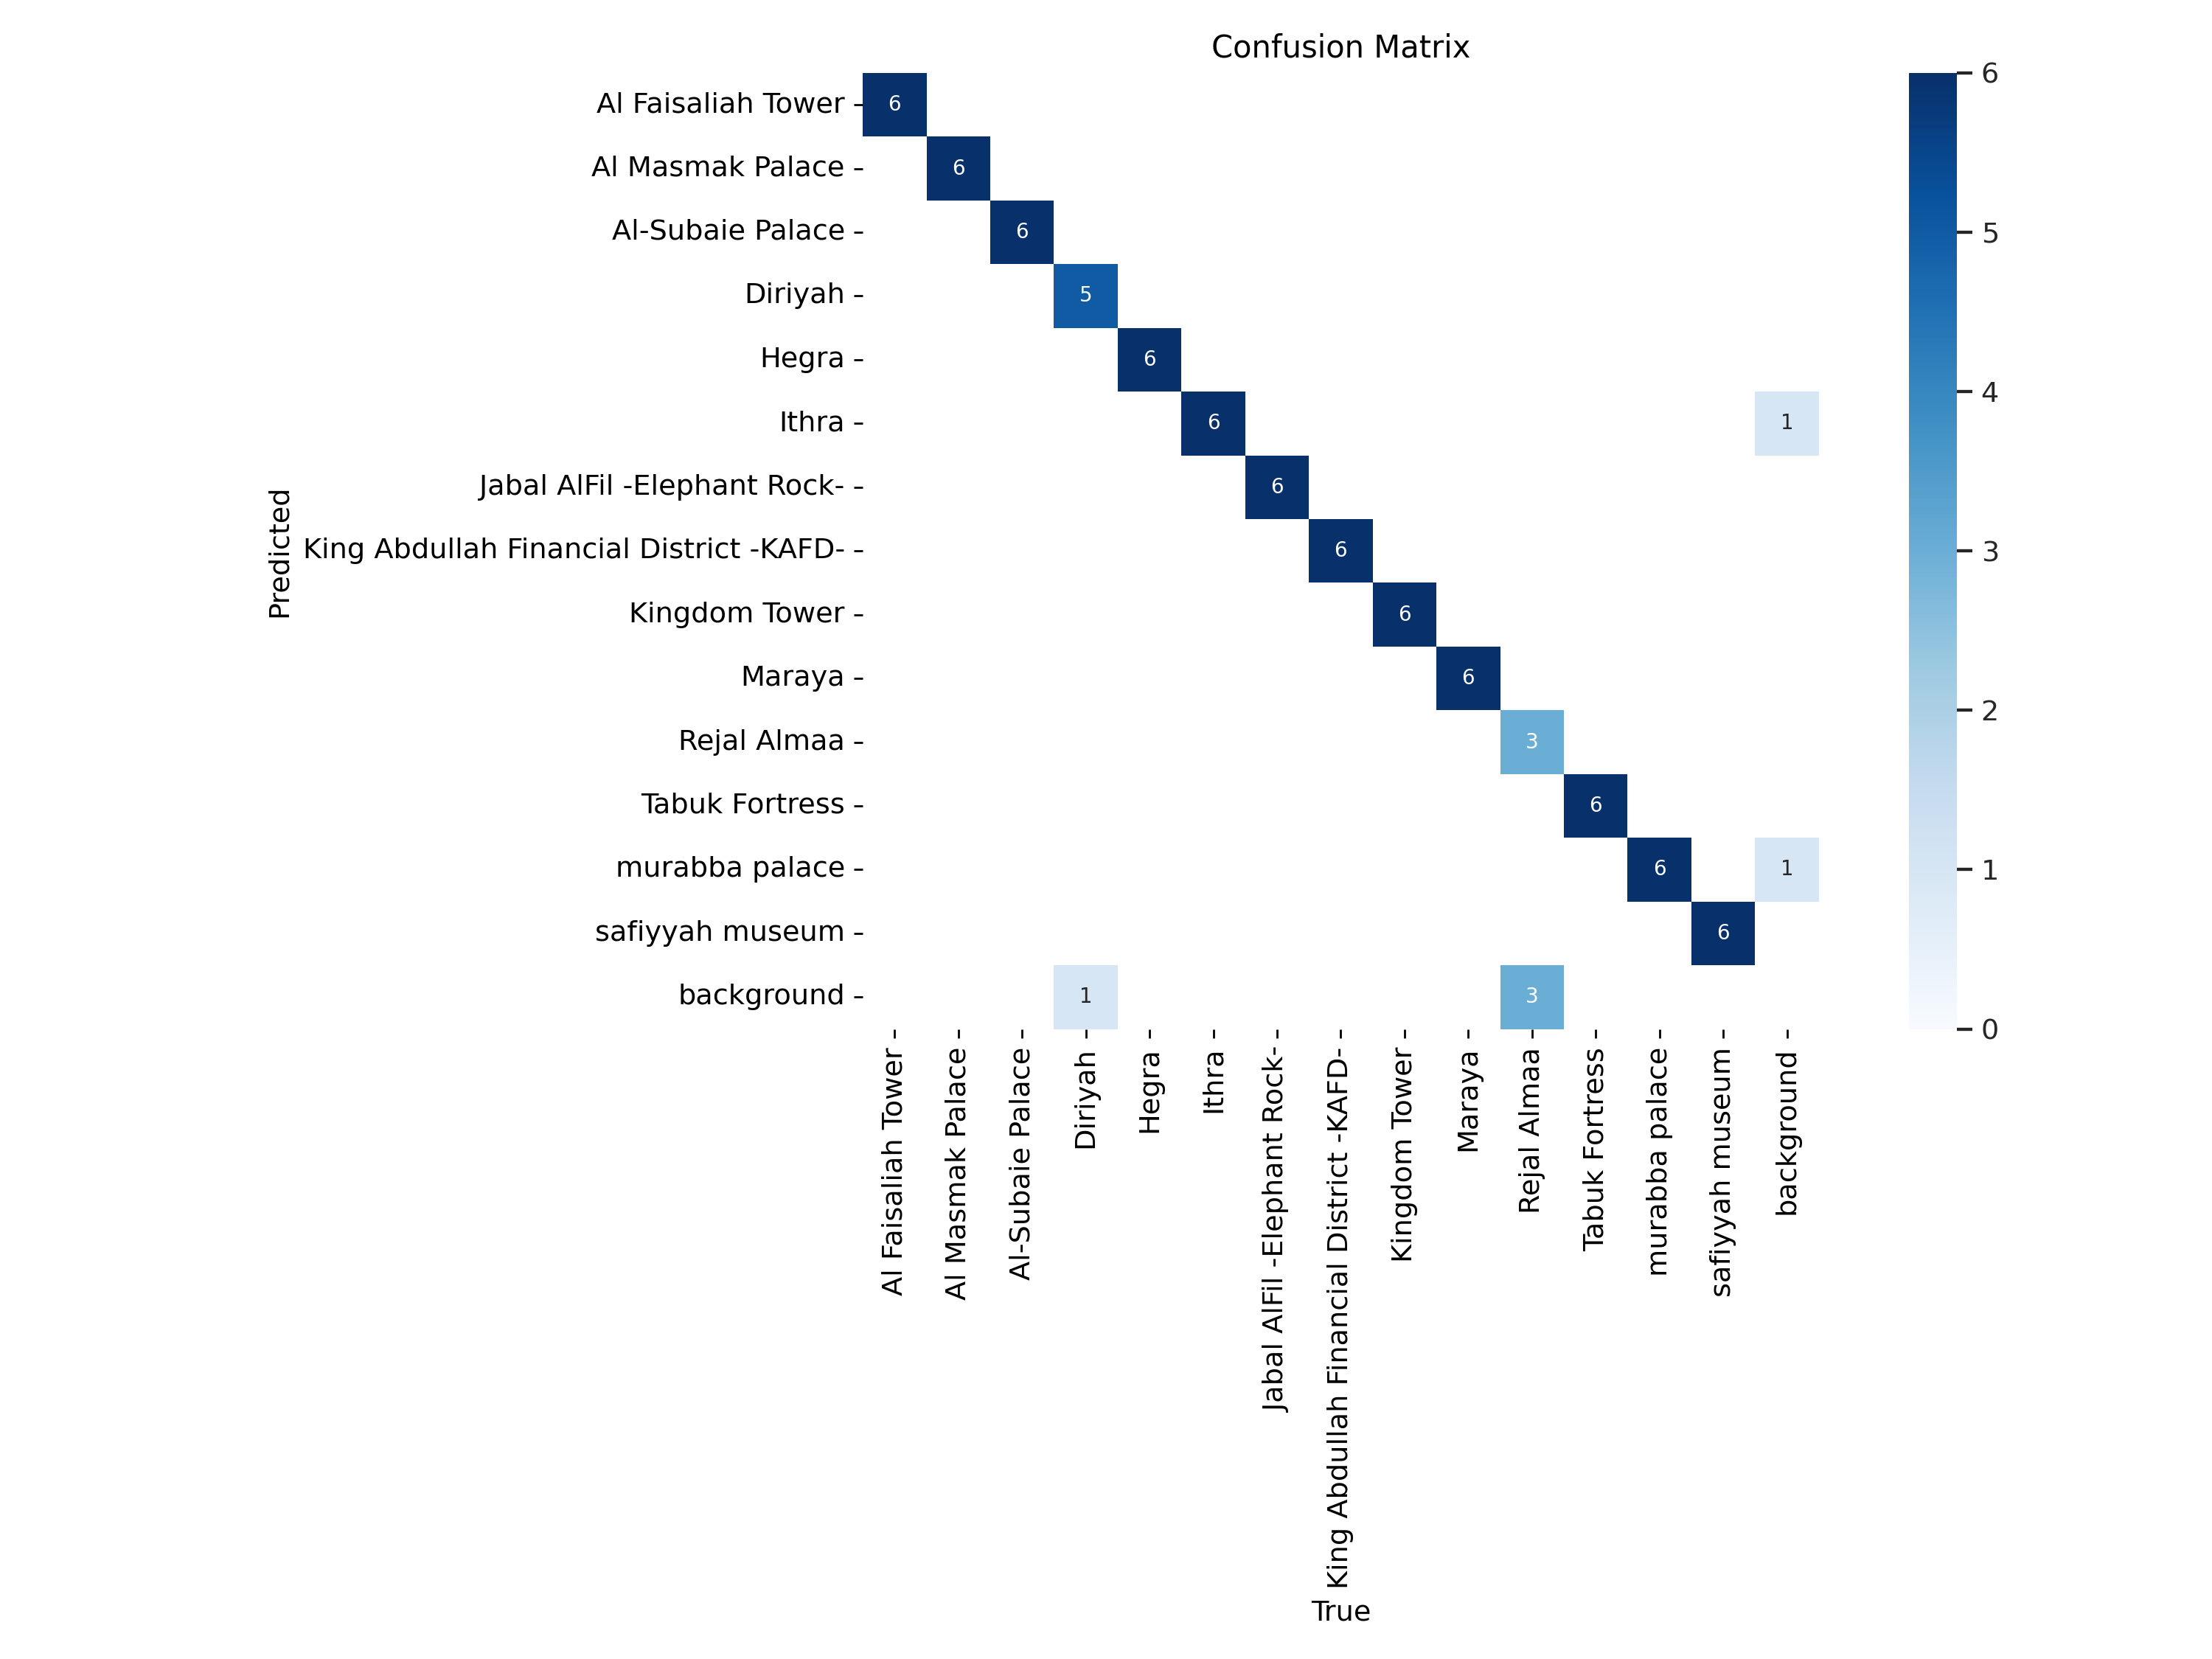

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

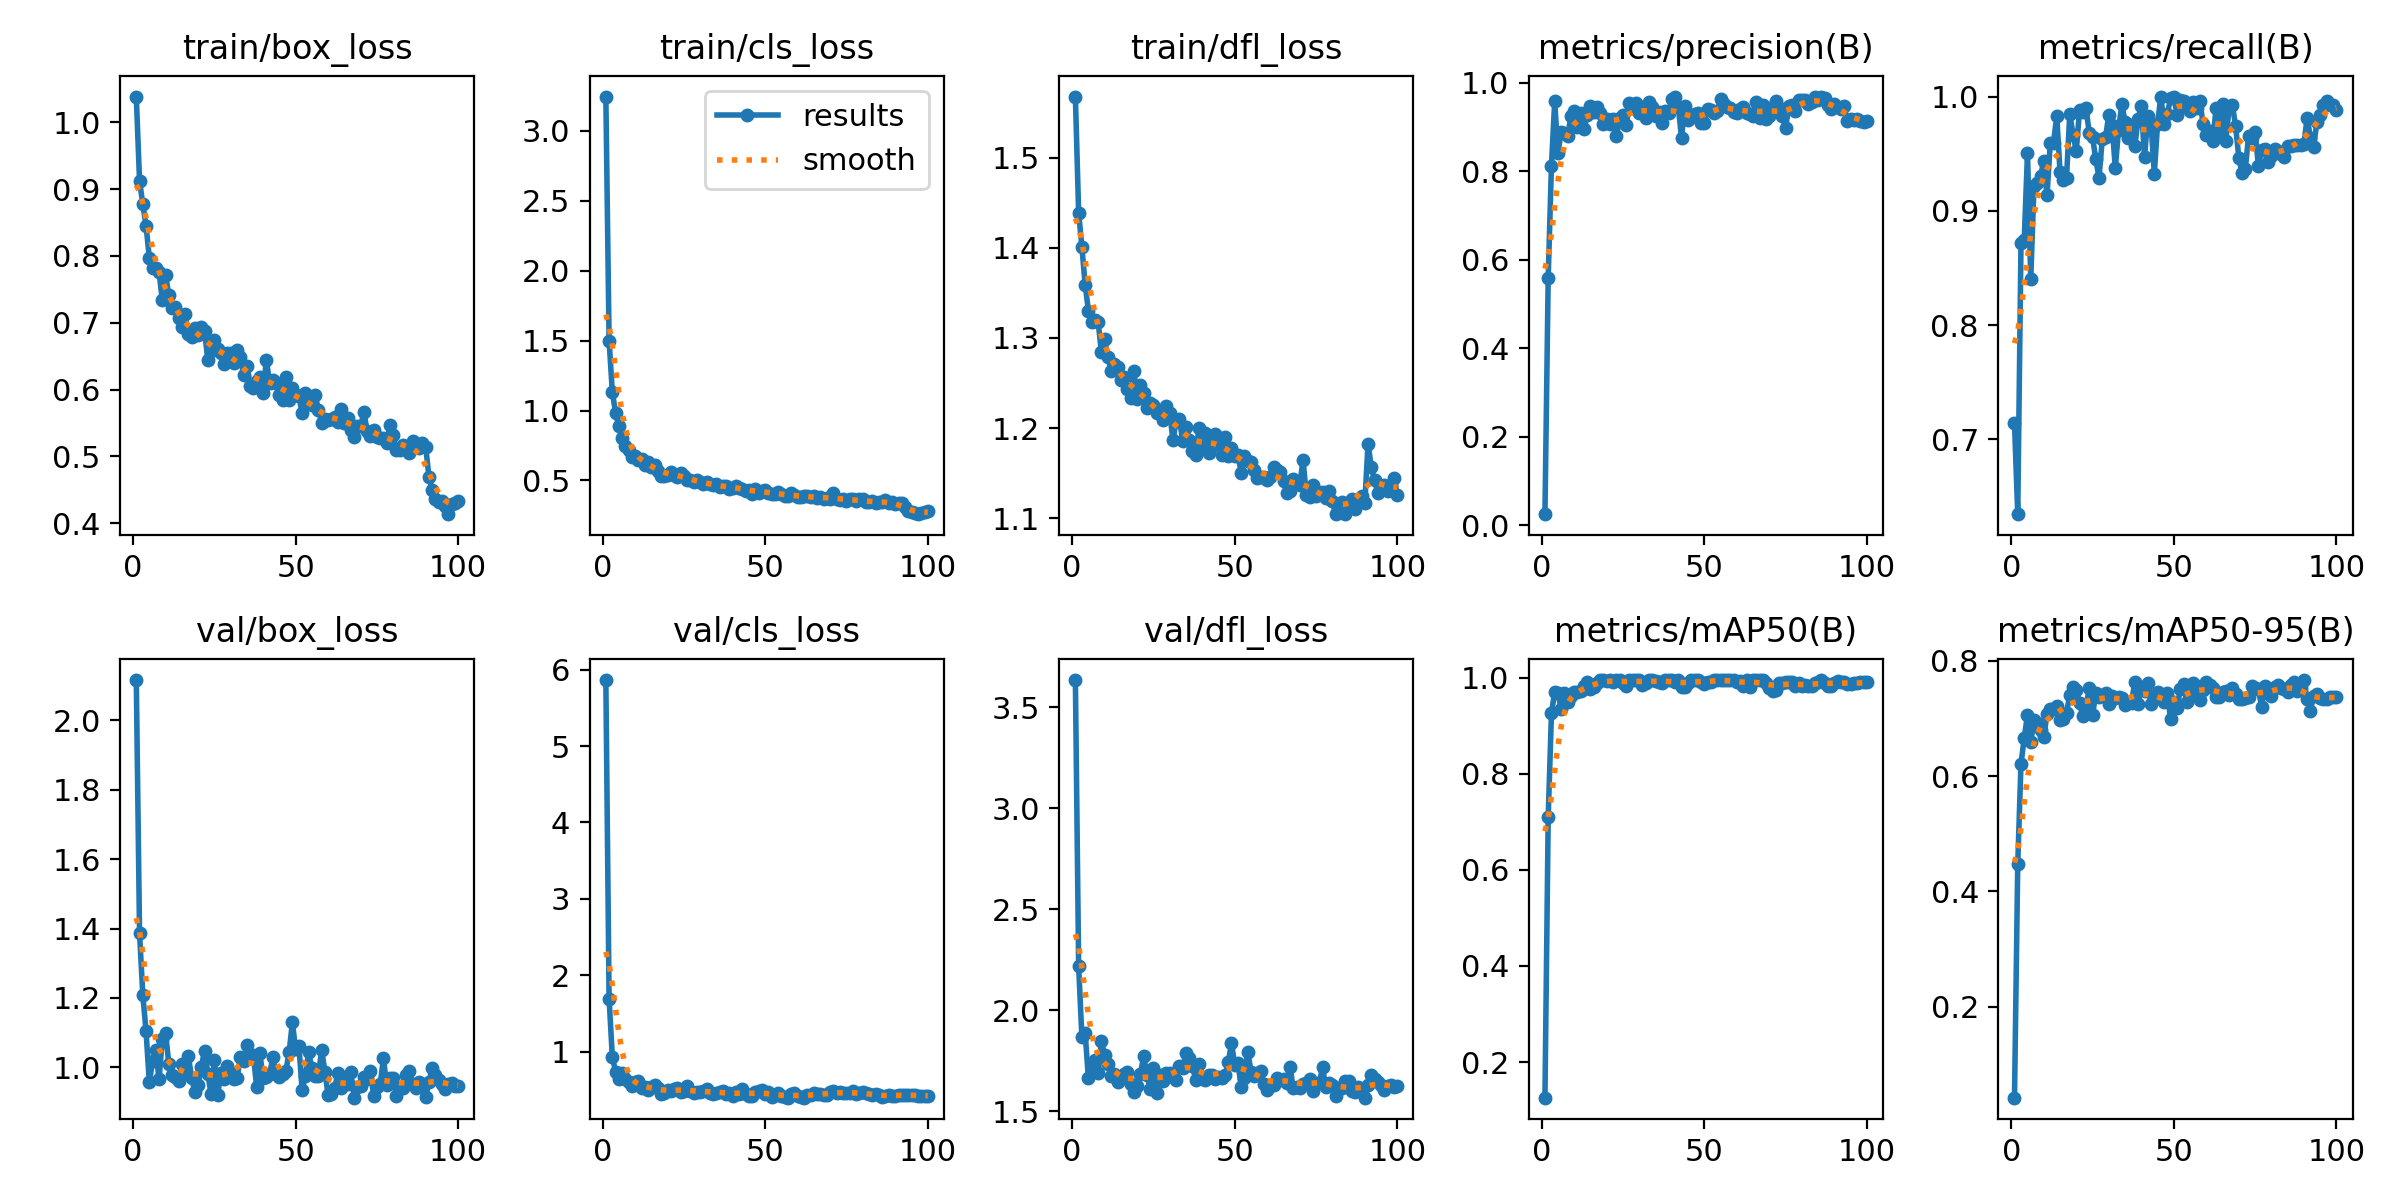

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Validate fine-tuned model

In [10]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,418,218 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /kaggle/working/datasets/pro-11/valid/labels.cache... 84 images, 0
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         84         84      0.952      0.959      0.989      0.766
    Al Faisaliah Tower          6          6      0.938          1      0.995       0.87
      Al Masmak Palace          6          6      0.947          1      0.995      0.856
      Al-Subaie Palace          6          6      0.936          1      0.995      0.893
               Diriyah          6          6          1      0.911      0.995      0.826
                 Hegra          6          6      0.946          1      0.995      0.538
                 Ithra          6          6      0.947          1      0.995      0.582
Jabal AlFil -Elephant Rock-          6          6

## Inference with custom model

In [11]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,418,218 parameters, 0 gradients, 21.3 GFLOPs

image 1/84 /kaggle/working/datasets/pro-11/test/images/-e-a-e-a-e-e-_png.rf.709319942c95d70ecb48d5be81944f32.jpg: 640x640 1 Jabal AlFil -Elephant Rock-, 15.6ms
image 2/84 /kaggle/working/datasets/pro-11/test/images/109208786_2954325424636224_2166801035315895787_n_png.rf.d2d49ed429af8be36334dafeed12db35.jpg: 640x640 1 King Abdullah Financial District -KAFD-, 15.8ms
image 3/84 /kaggle/working/datasets/pro-11/test/images/223141-10_85_png.rf.54bdaaeed4324f41ef9df98e0ed92279.jpg: 640x640 1 Hegra, 15.6ms
image 4/84 /kaggle/working/datasets/pro-11/test/images/2396027_png.rf.f8cc5f013632c35ed4ee6b9fb1f850a3.jpg: 640x640 1 Ithra, 15.6ms
image 5/84 /kaggle/working/datasets/pro-11/test/images/5998814078711219385_jpg.rf.e46bf7fa610ef98b284b5794218b4968.jpg: 640x640 1 Al-Subaie Palace, 15.6ms
image 6/84 /kaggle/working/datasets/pro-11

**NOTE:** Let's take a look at few results.

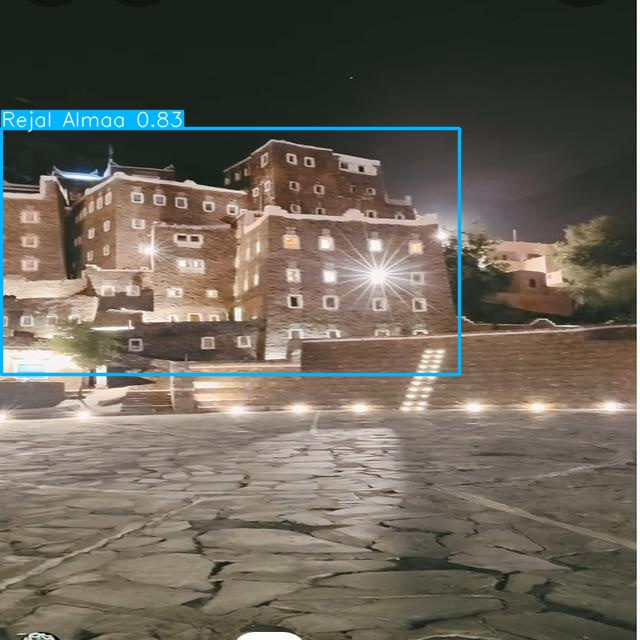

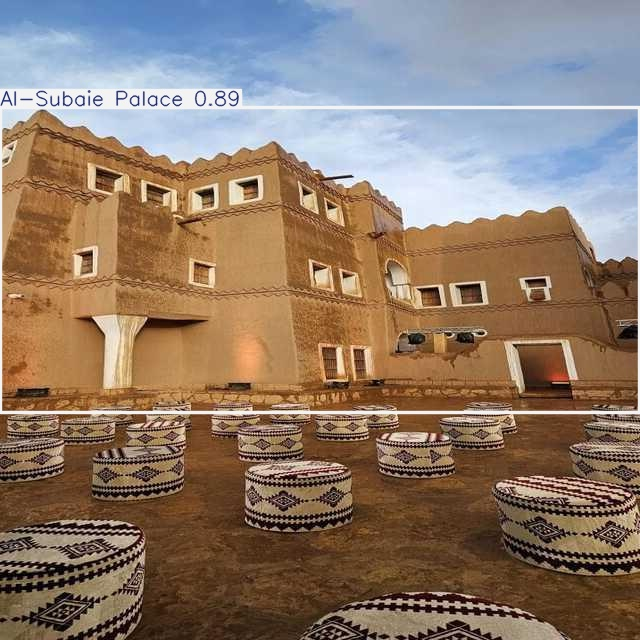

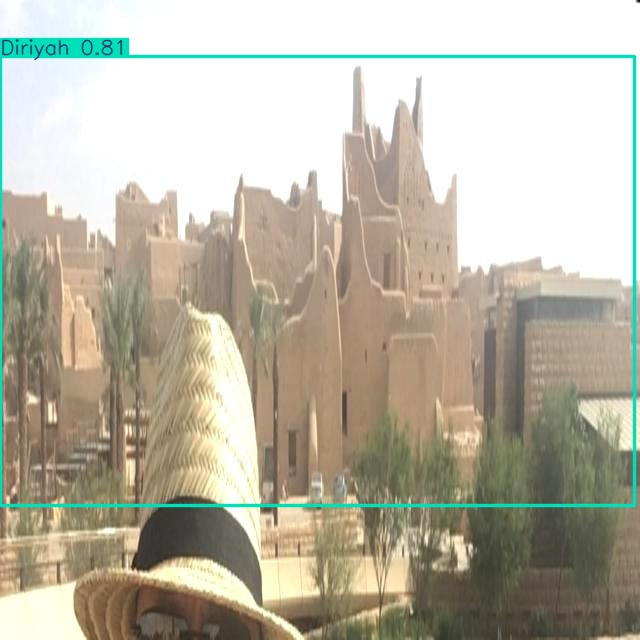

In [12]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO('/content/best (3).pt')

image_path = "/content/Screenshot 2024-12-24 024454.png"

output_dir = "output/"
results = model.predict(source=image_path, save=True, save_dir=output_dir)

output_image_path = f"{output_dir}/{image_path.split('/')[-1]}"

img = cv2.imread(output_image_path)


image 1/1 /content/Screenshot 2024-12-24 024454.png: 416x640 1 Tabuk Fortress, 327.5ms
Speed: 3.2ms preprocess, 327.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict8
